In [1]:
#!pip install pydrive

In [2]:
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials 

In [3]:
# 1. Authenticate and create the PyDrive client.

#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)
#file_id = '1vmNjaOxUU-hH-O7_5_iElFQhAZvt8ESS'
#downloaded = drive.CreateFile({'id': file_id})
#downloaded.GetContentFile('grip_str.sas7bdat')

In [4]:
# 자료 불러오기
import pandas as pd
dt_grip = pd.read_sas("grip_str.sas7bdat", format="sas7bdat").dropna() 

In [5]:
dt_grip.shape

(11323, 48)

In [6]:
dt_grip.head()

,ID,sex,age,ho_incm,edu,occp,marri_1,sm_presnt,dr_high,pa_aerobic,...,N_K,N_VA,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,max_grip_rt,max_grip_lt
0,b'A209716213',2.0,30.0,3.0,4.0,7.0,2.0,0.0,0.0,1.0,...,3035.899499,1335.998584,7476.633795,88.505252,2.524458,1.702372,13.792368,69.967986,28.4,26.4
2,b'A209716216',1.0,29.0,3.0,4.0,7.0,2.0,0.0,0.0,1.0,...,5018.153615,2181.289291,11339.248496,291.693538,3.853337,3.065095,22.947486,65.287764,50.6,47.8
3,b'A209724716',1.0,65.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0,...,1952.808521,452.073639,2102.115596,100.982500,1.164780,1.098967,11.789950,43.467542,33.1,33.6
4,b'A209731516',1.0,66.0,2.0,4.0,7.0,1.0,0.0,0.0,1.0,...,2339.124348,854.972445,4817.173801,51.367319,1.015765,0.579514,10.199538,56.882524,36.5,35.4
6,b'A209736615',2.0,41.0,3.0,3.0,7.0,1.0,0.0,1.0,1.0,...,2214.850076,276.389343,1509.860228,19.627705,0.932423,0.742740,16.719703,146.408221,31.7,29.6


In [7]:
# 원본파일을 복사하여 사용, 원자료는 조작하지 않는다
dt = dt_grip.copy()

# index와 동일한 ID 변수 삭제
dt = dt.drop(columns = ['ID'], axis = 1)

In [8]:
## 변수 속성 변경
features_nm_list = [dt.columns]
cat_features_nm_list = ['sex', 'ho_incm', 'edu', 'occp', 'marri_1', 'sm_presnt', 'dr_high', 'pa_aerobic', 'pa_walk', 'pa_muscle']
num_features_nm_list = ['age', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI', 'HE_HP', 'HE_DM',
        'HE_HCHOL', 'GS_use', 'N_WAT_C', 'N_INTK', 'N_EN', 'N_WATER', 'N_PROT',
        'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_N3', 'N_N6', 'N_chol', 'N_CHO',
        'N_tdf', 'N_CA', 'N_PHOS', 'N_FE', 'N_NA', 'N_K', 'N_VA', 'N_CAROT',
        'N_RETIN', 'N_B1', 'N_B2', 'N_NIAC', 'N_VITC']

#카테고리 변수 속성변경
for i in cat_features_nm_list:
    dt[i]=pd.Categorical(dt[i])

#정수형 속성 변경 
dt['age']= dt['age'].astype('int64')

In [9]:
len(num_features_nm_list)

35

In [10]:
# Target 컬럼 생성 - 왼손 악력과 오른손 악력 중 최대값을 타겟으로 한다.
target_dt = dt[['max_grip_rt', 'max_grip_lt']].max(axis = 1)
features_dt = dt.drop(columns = ['max_grip_rt', 'max_grip_lt'], axis = 1)

In [11]:
target_dt.head()

0    28.4
2    50.6
3    33.6
4    36.5
6    31.7
dtype: float64

In [12]:
features_dt.head()

,sex,age,ho_incm,edu,occp,marri_1,sm_presnt,dr_high,pa_aerobic,pa_walk,...,N_FE,N_NA,N_K,N_VA,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC
0,2.0,30,3.0,4.0,7.0,2.0,0.0,0.0,1.0,0.0,...,14.020208,3812.602629,3035.899499,1335.998584,7476.633795,88.505252,2.524458,1.702372,13.792368,69.967986
2,1.0,29,3.0,4.0,7.0,2.0,0.0,0.0,1.0,1.0,...,28.731917,7064.860766,5018.153615,2181.289291,11339.248496,291.693538,3.853337,3.065095,22.947486,65.287764
3,1.0,65,1.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,...,11.974037,1894.033626,1952.808521,452.073639,2102.115596,100.982500,1.164780,1.098967,11.789950,43.467542
4,1.0,66,2.0,4.0,7.0,1.0,0.0,0.0,1.0,0.0,...,6.532706,885.990579,2339.124348,854.972445,4817.173801,51.367319,1.015765,0.579514,10.199538,56.882524
6,2.0,41,3.0,3.0,7.0,1.0,0.0,1.0,1.0,1.0,...,7.797968,2023.504797,2214.850076,276.389343,1509.860228,19.627705,0.932423,0.742740,16.719703,146.408221


In [13]:
features_dt[num_features_nm_list].describe()

,age,HE_ht,HE_wt,HE_wc,HE_BMI,HE_HP,HE_DM,HE_HCHOL,GS_use,N_WAT_C,...,N_FE,N_NA,N_K,N_VA,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC
count,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.00000,11323.000000,11323.000000,...,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000
mean,50.301334,162.716215,63.378575,82.148326,23.848248,1.833260,1.457211,0.18352,1.159322,4.879966,...,17.677545,3838.661006,3085.455546,746.158149,3646.071568,118.626789,2.001743,1.358762,16.425643,108.082475
std,16.504178,9.040680,12.010718,10.020820,3.471034,0.858738,0.690103,0.38711,0.493428,3.027260,...,34.337997,3019.553459,1660.606289,1072.782731,5675.059438,467.535393,1.031521,0.836063,10.899158,121.766678
min,19.000000,116.100000,32.700000,52.300000,14.143848,1.000000,1.000000,0.00000,1.000000,0.000000,...,0.373358,1.579394,34.111520,0.000000,0.000000,0.000000,0.034350,0.009160,0.160300,0.000000
25%,37.000000,156.100000,54.700000,74.900000,21.421801,1.000000,1.000000,0.00000,1.000000,3.000000,...,10.671736,2151.312533,2002.155057,289.370595,1260.616621,18.744660,1.299657,0.803296,9.953781,31.327033
50%,51.000000,162.200000,61.800000,82.000000,23.557396,2.000000,1.000000,0.00000,1.000000,4.500000,...,15.062212,3283.257630,2785.972370,507.585092,2360.445394,59.378514,1.812120,1.206472,14.305364,67.184194
75%,64.000000,169.200000,70.500000,88.800000,25.922859,3.000000,2.000000,0.00000,1.000000,6.000000,...,21.264567,4862.328277,3808.741090,855.746199,4222.534155,121.212837,2.477915,1.734548,20.195689,143.410200
max,80.000000,192.500000,141.500000,130.300000,44.333804,3.000000,3.000000,1.00000,3.000000,40.000000,...,3458.914010,170391.541855,28939.568536,30630.998453,183405.713043,26908.522697,13.646730,26.588661,557.272446,2053.286068


### 자료 탐색

In [14]:
cat_features_nm_list

['sex',
 'ho_incm',
 'edu',
 'occp',
 'marri_1',
 'sm_presnt',
 'dr_high',
 'pa_aerobic',
 'pa_walk',
 'pa_muscle']

In [15]:
# 카테고리 피쳐들의 비율 확인
for i in cat_features_nm_list:
  print(round(dt[i].value_counts(normalize=True)*100,2))

2.0    57.37
1.0    42.63
Name: sex, dtype: float64
4.0    30.08
3.0    28.39
2.0    24.68
1.0    16.85
Name: ho_incm, dtype: float64
4.0    35.80
3.0    33.64
1.0    20.26
2.0    10.30
Name: edu, dtype: float64
7.0    40.07
1.0    14.02
3.0    12.60
2.0    10.27
5.0     9.56
6.0     8.50
4.0     4.98
Name: occp, dtype: float64
1.0    83.88
2.0    16.12
Name: marri_1, dtype: float64
0.0    83.26
1.0    16.74
Name: sm_presnt, dtype: float64
0.0    89.98
1.0    10.02
Name: dr_high, dtype: float64
0.0    51.26
1.0    48.74
Name: pa_aerobic, dtype: float64
0.0    60.26
1.0    39.74
Name: pa_walk, dtype: float64
0.0    79.87
1.0    20.13
Name: pa_muscle, dtype: float64


In [16]:
# 시각화 하여 확인한다.
import matplotlib.pyplot as plt

fig,  axs = plt.subplots(nrows=10, figsize=(20,30))
n = 0
for i in cat_features_nm_list:
    cnt_dt = pd.DataFrame(dt[i].value_counts(normalize=True))
    cnt_dt.plot.bar(rot=0, ax=axs[n])
    plt.xticks(rotation=45)
    n += 1

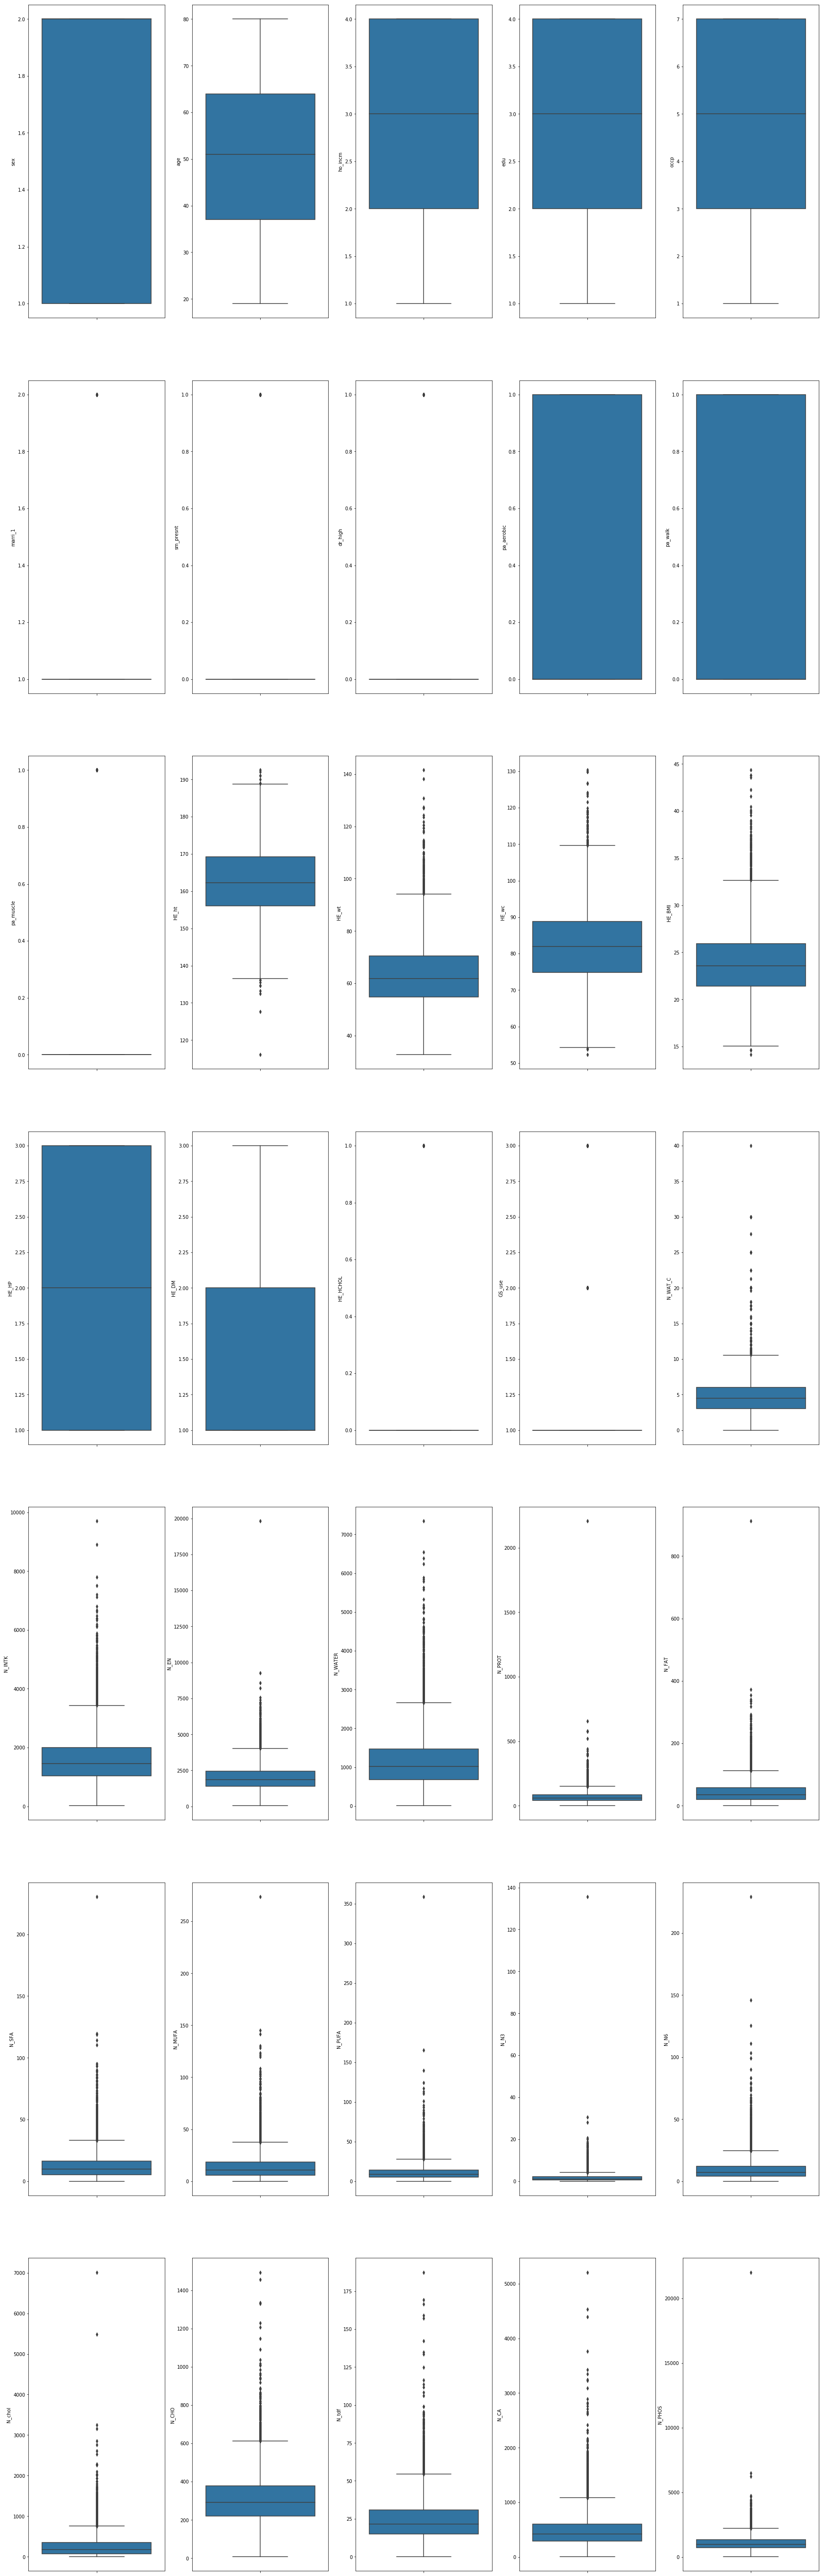

In [17]:
import seaborn as sns
fig,  axs = plt.subplots(7, 5,figsize=(30,100))
i = 0
col_nm = list(dt.columns)
for r in range(0, 7):
    for c in range(0,5):
        sns.boxplot(y=dt[col_nm[i]], ax=axs[r, c])
        i += 1
        

In [18]:
# one-hot-encoding 
features_dt_dm =  pd.get_dummies(features_dt)

In [19]:
features_dt_dm.head()

,age,HE_ht,HE_wt,HE_wc,HE_BMI,HE_HP,HE_DM,HE_HCHOL,GS_use,N_WAT_C,...,sm_presnt_0.0,sm_presnt_1.0,dr_high_0.0,dr_high_1.0,pa_aerobic_0.0,pa_aerobic_1.0,pa_walk_0.0,pa_walk_1.0,pa_muscle_0.0,pa_muscle_1.0
0,30,153.4,68.1,81.9,28.939858,1.0,1.0,0.0,1.0,3.5,...,1,0,1,0,0,1,1,0,0,1
2,29,171.2,84.0,85.5,28.659708,2.0,1.0,0.0,1.0,4.0,...,1,0,1,0,0,1,0,1,0,1
3,65,160.8,52.2,71.0,20.188238,3.0,3.0,0.0,1.0,3.0,...,0,1,1,0,0,1,0,1,1,0
4,66,168.8,68.8,84.0,24.145909,2.0,1.0,0.0,1.0,5.0,...,1,0,1,0,0,1,1,0,1,0
6,41,162.2,80.5,98.4,30.598080,2.0,1.0,0.0,1.0,15.0,...,1,0,0,1,0,1,0,1,1,0


In [20]:
# Train데이터와 Test를 나눈다.
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_dt_dm, target_dt, random_state=0)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8492, 64)
(8492,)
(2831, 64)
(2831,)


In [22]:
y_train.shape

(8492,)

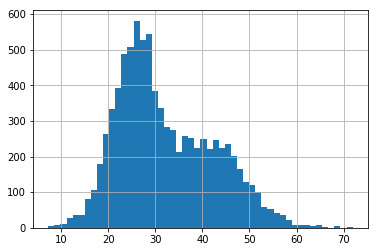

In [23]:
# train set 의 target 분포
import matplotlib.pyplot as plt
y_train.hist(bins=50)
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
y_test = y_scaler.transform(y_test[:, None])[:, 0]

# Model description
---

###  Automatic Relevance Determination  regression
    very similar to Bayesian Ridge Regression, but can lead to sparser weights w. ARDRegression poses a different prior over w, by dropping the assumption of the Gaussian being spherical.

In [25]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ridge_alphas = np.arange(0.001, 0.01, 0.001)
lasso_alphas = np.arange(0.001, 0.01, 0.001)
bridg_alphas1 = [0.01]
bridg_alphas2 = [0.01]

param_grid = [
              {'regressor':[ARDRegression()],
               'regressor__alpha_1':bridg_alphas1,
               'regressor__alpha_2':bridg_alphas2}
             ]
KFold = KFold(n_splits=10)
                 
pipe = Pipeline([('regressor', ARDRegression())])

## GridSeach : 회귀의 평가지표는 R^2이다. 
grid_ridge = GridSearchCV(pipe, param_grid=param_grid, scoring='r2', cv=KFold, verbose=1, return_train_score=True)

grid_result = grid_ridge.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 155.2min finished


In [26]:
print("Grid search를 이용하여 구한 최적의 파라미터는 : {}".format(grid_result.best_params_))

Grid search를 이용하여 구한 최적의 파라미터는 : {'regressor': ARDRegression(alpha_1=0.01, alpha_2=0.01, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, threshold_lambda=10000.0, tol=0.001, verbose=False), 'regressor__alpha_1': 0.01, 'regressor__alpha_2': 0.01}


In [27]:
print("Grid search에 대한 R^2 값: {:.3f}".format(grid_result.best_score_))

Grid search에 대한 R^2 값: 0.756


In [28]:
print("테스트 대한 R^2값: {:.3f}".format(grid_result.score(X_test, y_test)))

테스트 대한 R^2값: 0.743


In [29]:
# MSE 계산
from sklearn.metrics import mean_squared_error
y_pred = grid_result.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: {:.5f}".format(mse))

MSE: 0.25432


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


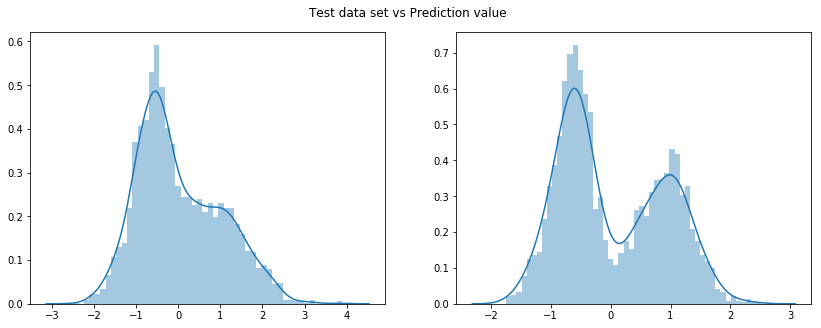

In [30]:
##예측값과 실제값 비교
import seaborn as sns
y_pred = grid_result.predict(X_test)
fig,(ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(14,5)
sns.distplot(y_test, ax=ax1, bins=50)
fig.suptitle("Test data set vs Prediction value", y=0.95);
sns.distplot(y_pred, ax=ax2, bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


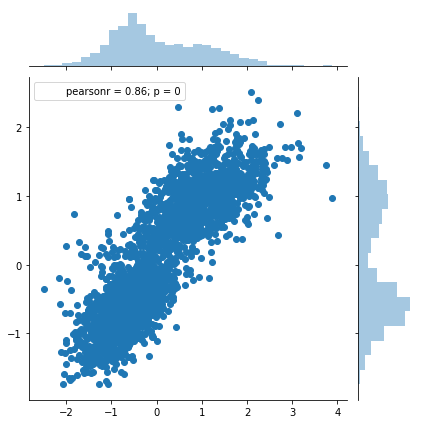

In [31]:
sns.jointplot(y_test, y_pred)